# Emily Dickinson word frequency

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('../input/597-poems-by-emily-dickinson/emily-flattened.csv')
# Keeping only the neccessary columns
poems = data['poem']
seasons = data['season']

print(seasons)



0        none
1        none
2      summer
3      spring
4      second
        ...  
588      none
589      none
590      late
591    autumn
592    summer
Name: season, Length: 593, dtype: object


Primero se importan las bibliotecas numpy y pandas. numpy se utiliza comúnmente para operaciones de álgebra lineal, mientras que pandas se utiliza para el manejo y análisis de datos, en particular para trabajar con estructuras de datos tabulares como DataFrames.

Posteriormente se seleccionan dos columnas del DataFrame cargado: la columna 'poem', que contiene los poemas de Emily Dickinson, y la columna 'season', que parece contener información sobre la estación asociada con cada poema.

Al final se imprime la serie de datos que contiene las estaciones asociadas a cada poema. Esto proporciona una muestra de cómo se ven los datos en esa columna.

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

def plotWordFrequency(input):
    data = sorted([(w, input.count(w)) for w in set(input)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=most_words, height=times_used, color = 'pink', edgecolor = 'red',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words', fontsize=24)
    plt.show()

Ahora se importa la biblioteca matplotlib para crear visualizaciones de datos.

La función plotWordFrequency toma una lista de palabras como entrada y genera un gráfico de barras mostrando las frecuencias de las palabras más comunes.
Dentro de la función:
- Se calcula la frecuencia de cada palabra en la lista de entrada y se seleccionan las 40 palabras más comunes.
- Las palabras y sus frecuencias se almacenan en listas separadas.
- Se crea el gráfico de barras utilizando plt.bar(), donde las palabras se colocan en el eje x y las frecuencias en el eje y

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


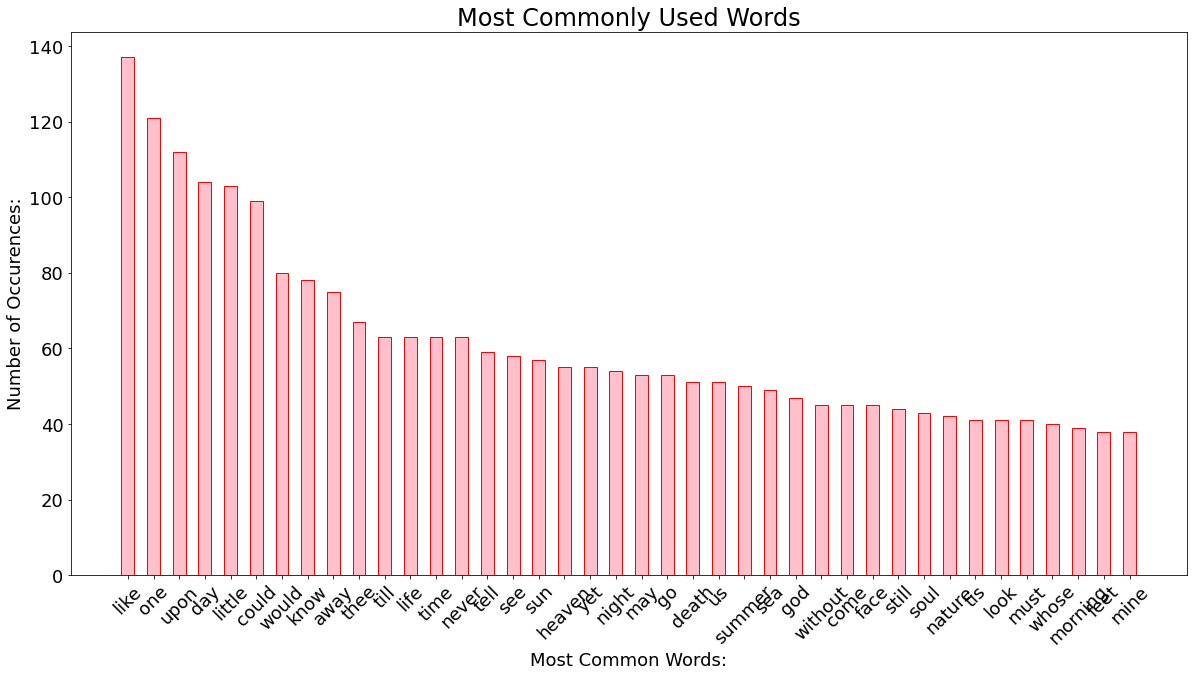

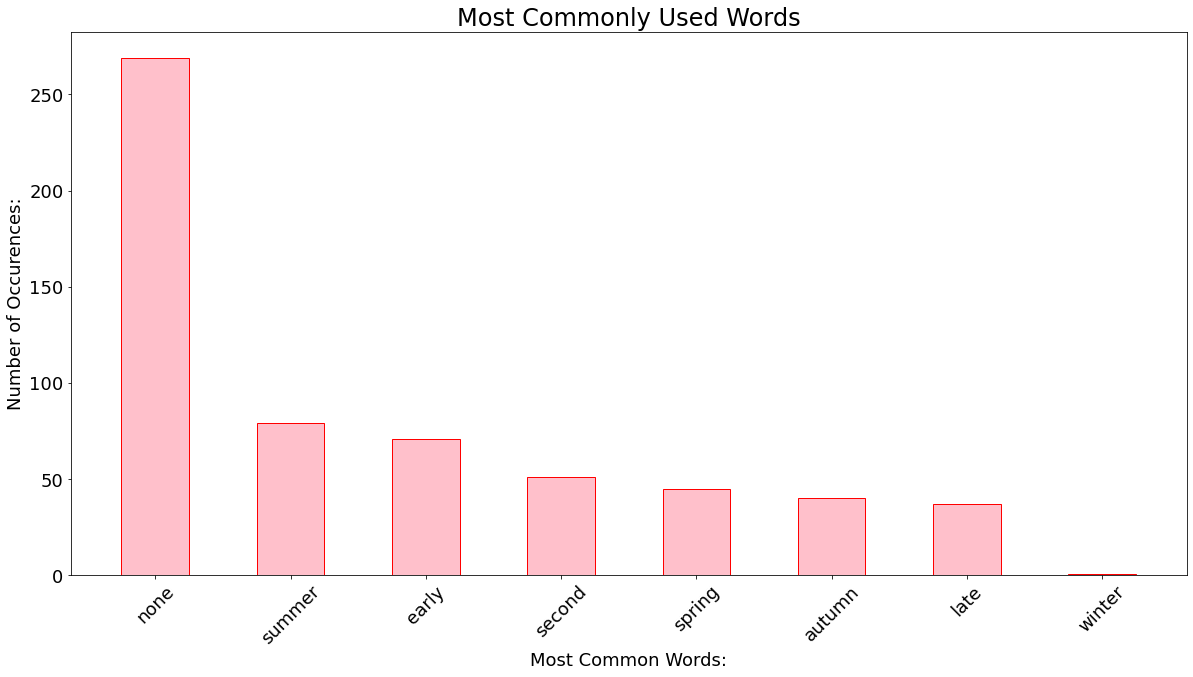

In [3]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))

wordsFiltered = []
seasonsFiltered = []

def createPoemString(data):
    words = ' '.join(data)
    split_words = " ".join([word for word in words.split()])
    
    tokenizer = RegexpTokenizer(r'\w+')
    cleaned_words = tokenizer.tokenize(split_words.lower())
    
    for word in cleaned_words:
        if word not in stopWords and word is not '':
            wordsFiltered.append(word)
            
            
def createSeasonString(data):
    words = ' '.join(data)
    tokens = nltk.tokenize.word_tokenize(words.lower())
    for word in tokens:
       seasonsFiltered.append(word)
            
createPoemString(poems)

createSeasonString(seasons)

plotWordFrequency(wordsFiltered)

plotWordFrequency(seasonsFiltered)


- Se importa la biblioteca nltk, se descargan las palabras vacías ('stopwords') en inglés y se importan los módulos necesarios para el tokenizado y filtrado de palabras.
- Se define una lista stopWords que contiene las palabras vacías en inglés.
- Se definen dos listas vacías, wordsFiltered y seasonsFiltered, que se utilizarán para almacenar las palabras filtradas de los poemas y las estaciones, respectivamente.
- Se definen dos funciones, createPoemString y createSeasonString, para procesar los poemas y las estaciones, respectivamente. Estas funciones tokenizan las palabras, las convierten a minúsculas y eliminan las palabras vacías antes de agregarlas a las listas filtradas correspondientes.
- Se llaman a las funciones createPoemString y createSeasonString para procesar los poemas y las estaciones.

Después de ejecutar lo anterior podemos observar dos gráficos donde podemos observar con base en las frecuencias las palabras más comunes en los poemas de Emily Dickinson.

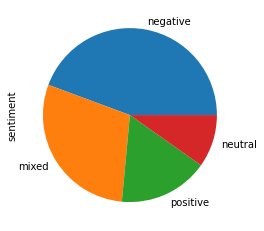

In [4]:
import matplotlib.pyplot as plt
data['sentiment'].value_counts().head(10).plot.pie()
plt.gca().set_aspect('equal')

- Primero se utiliza el método value_counts() en la columna `sentiment` del DataFrame data para contar el número de ocurrencias de cada valor único en esa columna.
- Después se seleccionan los 10 valores más comunes utilizando el método head(10).

Podemos observar un grafico de pastel en el cual podemos observar la distribucion de cada sentimiento mas frecuentes en la columna `sentiment`

In [5]:
data.sentiment.value_counts()

negative    263
mixed       173
positive     99
neutral      58
Name: sentiment, dtype: int64

In [6]:
data.season.value_counts()

none      269
summer     79
early      70
second     51
spring     45
autumn     40
late       37
early       1
winter      1
Name: season, dtype: int64

las dos celdas de código anterior se utiliza la función value_counts() en las columnas 'season' y 'sentiment' para contabilizar todos los valores en estas columnas y los ordena en una lista de mayor a menor.

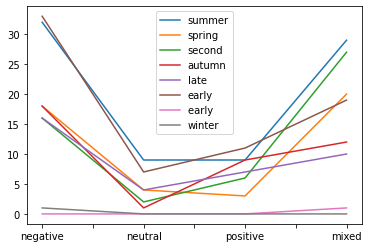

In [7]:
seasons = list(data['season'].unique())

sentiments = list(data['sentiment'].unique())

df = pd.DataFrame(

{ season :

    { sentiment : data[(data["season"]==season) & (data['sentiment']==sentiment)].id.count()

      for sentiment in sentiments

    }

  for season in seasons

})

df.drop(columns=['none']).plot()


Por ultimo se crearon dos listas que contienen los valores únicos de las columnas 'season' y  'sentiment'
 - Se utiliza un diccionario de comprensión anidado para crear un DataFrame llamado df. En este diccionario, las claves son las estaciones y los valores son diccionarios anidados donde las claves son los sentimientos y los valores son el recuento de la columna 'id' (o cualquier otra columna que esté presente en data) para las filas que cumplen con las condiciones especificadas (por ejemplo, 'season' igual a la estación actual y 'sentiment' igual al sentimiento actual).

 - Se elimina la columna 'none' del DataFrame utilizando el método drop() con el parámetro columns=['none'].
 - Finalmente, se llama al método plot() en el DataFrame para generar un gráfico de líneas que muestra la relación entre las estaciones y los sentimientos. Cada línea en el gráfico representa un sentimiento y las estaciones se muestran en el eje x.